<a href="https://www.kaggle.com/code/lorresprz/cicy4-training-curves-of-all-models?scriptVersionId=212006785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CICY4: Training Curves of All Models

In [1]:
import numpy as np
import pandas as pd
import os as os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import torch

In [2]:
seed = 42

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(seed)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Load full, train, validation and test sets

In [4]:
hodge = np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge.npy')
direct = np.load('/kaggle/input/calabi-yau-cicy-4-folds/direct.npy')
hodge = hodge[~direct]

In [5]:
y = hodge

In [6]:
def find_max_mean_min(hh):
    h11 = hh[:,0]
    h21 = hh[:,1]
    h22 = hh[:,3]
    h31 = hh[:,2]
    
    h11max = np.max(h11)
    h11min = np.min(h11)
    h11mean = np.round(np.mean(h11),3)
    print(f'Max h11: {h11max}, Min h11: {h11min}, Mean h11: {h11mean}')
    
    h21max = np.max(h21)
    h21min = np.min(h21)
    h21mean = np.round(np.mean(h21),3)
    print(f'Max h21: {h21max}, Min h21: {h21min}, Mean h21: {h21mean}')
    
    h31max = np.max(h31)
    h31min = np.min(h31)
    h31mean = np.round(np.mean(h31),3)
    print(f'Max h31: {h31max}, Min h31: {h31min}, Mean h31: {h31mean} ')
    
    h22max = np.max(h22)
    h22min = np.min(h22)
    h22mean = np.round(np.mean(h22),3)
    print(f'Max h22: {h22max}, Min h22: {h22min}, Mean h22: {h22mean} ')

    return h11max, h11min,h11mean, h21max, h21min, h21mean, h31max, h31min, h31mean, h22max, h22min, h22mean

In [7]:
h11max, h11min,h11mean, h21max, h21min, h21mean, h31max, h31min, h31mean, h22max, h22min, h22mean =  find_max_mean_min(hodge)

Max h11: 24, Min h11: 1, Mean h11: 10.065
Max h21: 33, Min h21: 0, Mean h21: 0.817
Max h31: 426, Min h31: 20, Mean h31: 39.551 
Max h22: 1752, Min h22: 204, Mean h22: 240.829 


## Load train, valid, test sets:

In [8]:
#TRAIN SET
X_train = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf_Xtrain.npy')
y_train = np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge_ytrain.npy')

#VALIDATION SET
X_valid = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf_Xvalid.npy')
y_valid = np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge_yvalid.npy')

# TEST SET
X_test = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf_Xtest.npy')
y_test= np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge_ytest.npy')

In [9]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((652092, 16, 20),
 (72455, 16, 20),
 (181137, 16, 20),
 (652092, 4),
 (72455, 4),
 (181137, 4))

In [10]:
#TRAIN SET-80pc
X_train_80 = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf_Xtrain_80.npy')
y_train_80 = np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge_ytrain_80.npy')

#VALIDATION SET-same

# TEST SET-12pc
X_test_80 = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf_Xtest_80.npy')
y_test_80= np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge_ytest_80.npy')

X_train_80.shape, X_valid.shape, X_test_80.shape, y_train_80.shape, y_valid.shape, y_test_80.shape

((724547, 16, 20),
 (72455, 16, 20),
 (108682, 16, 20),
 (724547, 4),
 (72455, 4),
 (108682, 4))

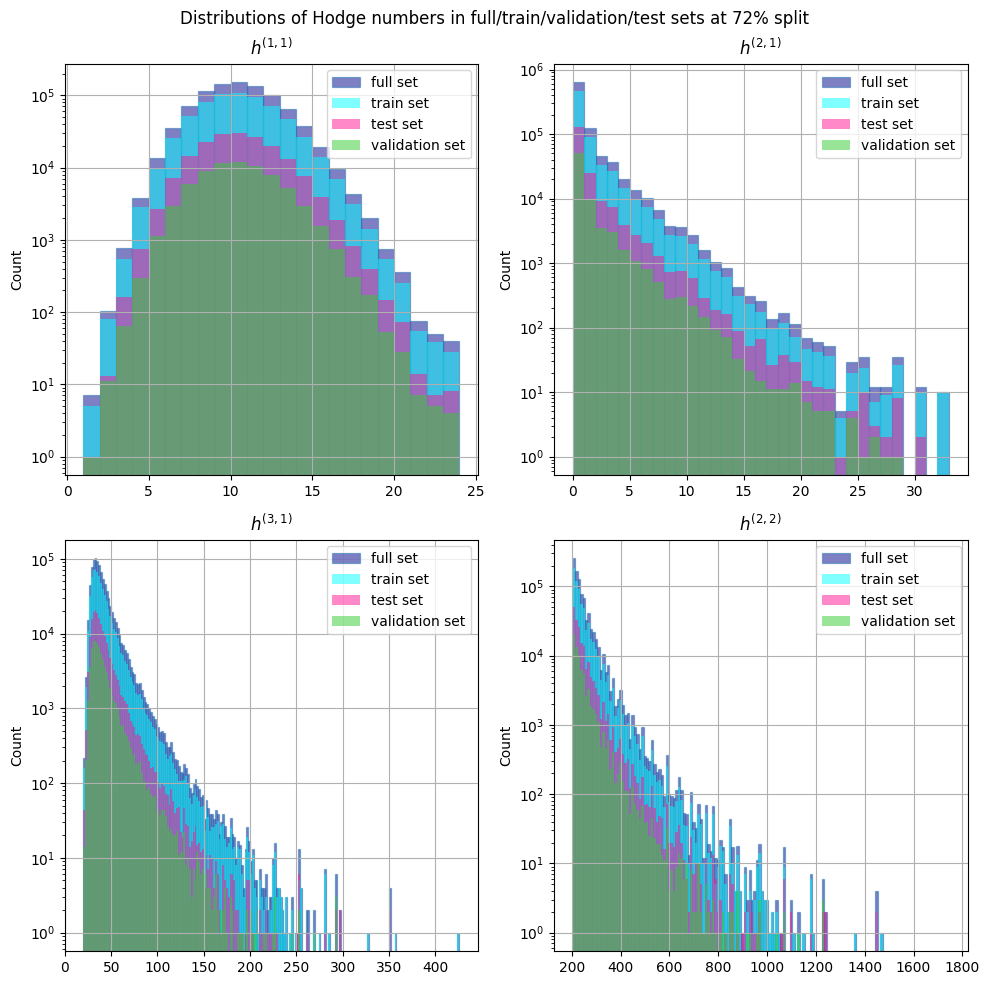

In [11]:
style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style3 = {'facecolor': 'limegreen'}
style2 = {'facecolor': 'deeppink'}
style1 = {'facecolor': 'cyan'}


fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)

ax[0,0].hist(y[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'full set', **style)
ax[0,0].hist(y_train[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'train set', **style1)
ax[0,0].hist(y_test[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'test set', **style2)
ax[0,0].hist(y_valid[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'validation set', **style3)
ax[0,0].set_title('$h^{(1,1)}$')
ax[0,0].set_ylabel('Count')
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_yscale('log')

ax[0,1].hist(y[:,1], bins=range(h21min, h21max+1), alpha=0.5, label = 'full set', **style)
ax[0,1].hist(y_train[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='train set',**style1)
ax[0,1].hist(y_test[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='test set',**style2)
ax[0,1].hist(y_valid[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='validation set',**style3)
ax[0,1].set_title('$h^{(2,1)}$')
ax[0,1].set_ylabel('Count')
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_yscale('log')

ax[1,0].hist(y[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='full set', **style)
ax[1,0].hist(y_train[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='train set',**style1)
ax[1,0].hist(y_test[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='test set',**style2)
ax[1,0].hist(y_valid[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='validation set',**style3)
ax[1,0].set_title('$h^{(3,1)}$')
ax[1,0].set_ylabel('Count')
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_yscale('log')

ax[1,1].hist(y[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'full set', **style)
ax[1,1].hist(y_train[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'train set',**style1)
ax[1,1].hist(y_test[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'test set',**style2)
ax[1,1].hist(y_valid[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'validation set', **style3)
ax[1,1].set_title('$h^{(2,2)}$')
ax[1,1].set_ylabel('Count')
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_yscale('log')

plt.suptitle('Distributions of Hodge numbers in full/train/validation/test sets at 72% split')
plt.savefig('Hodge_numbers_distributions')

# Training curves (80% dataset)

In [12]:
loss_dict_cnn_lstm_400d = pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/trained_models_80pc_split/loss_dict_cnn_lstm_400-80pc.csv')
loss_dict_lstm_424d = pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/trained_models_80pc_split/loss_dict_lstm_424_d80pc.csv')
loss_dict_lstm_448d = pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/trained_models_80pc_split/loss_dict_lstm_448_d80pc.csv')

loss_dict_80d = [loss_dict_cnn_lstm_400d, loss_dict_lstm_424d,
                 loss_dict_lstm_448d]

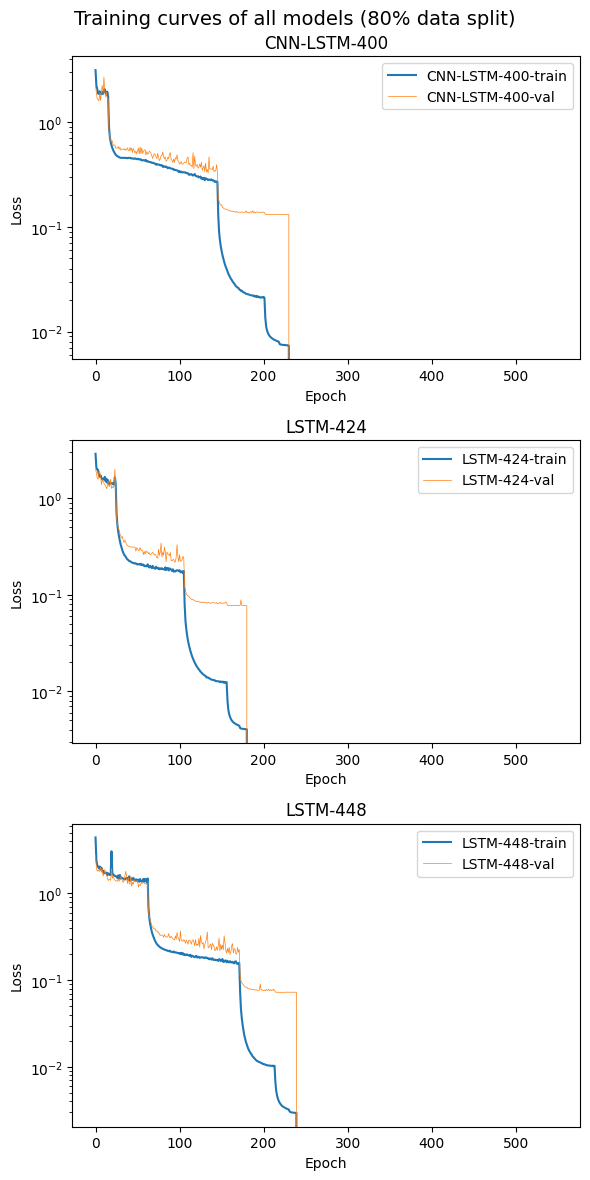

In [13]:
titles = ['CNN-LSTM-400','LSTM-424','LSTM-448']
#  LOG SCALE
fig, ax = plt.subplots(3,1, figsize = (6, 12), tight_layout = True)
for i in range(3):
    ax[i].plot(loss_dict_80d[i][['train_loss']], label = f'{titles[i]}-train')
    ax[i].plot(loss_dict_80d[i][['val_loss']], label = f'{titles[i]}-val',linewidth = 0.5)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Loss')
    ax[i].set_title(f'{titles[i]}')
    ax[i].legend()
    ax[i].set_yscale('log')

fig.suptitle('Training curves of all models (80% data split)', fontsize = 14)
plt.savefig('second_round_train-val_losses')

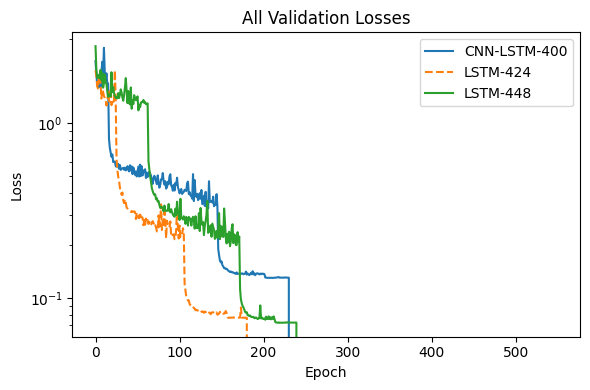

In [14]:
#ALL MODELS PLOTTED TOGETHER
fig, ax = plt.subplots(1,1, figsize = (6,4), tight_layout = True)
ax.plot(loss_dict_cnn_lstm_400d[['val_loss']], label = 'CNN-LSTM-400')
ax.plot(loss_dict_lstm_424d[['val_loss']], label = 'LSTM-424', linestyle = 'dashed')
ax.plot(loss_dict_lstm_448d[['val_loss']], label = 'LSTM-448')
ax.set_title('All Validation Losses')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.set_yscale('log')

plt.savefig('2nd_round_all_losses')

# Training curves of the 12 trained models (72% dataset)

## CNN-GRU hybrids

In [15]:
loss_dict_cnn_gru_384 = pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss-dict-cnn-gru-384.csv')
loss_dict_cnn_gru_416 = pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss-dict-cnn-gru-416.csv')
loss_dict_resnet_gru_256 = pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss-dict-resnet-gru-256.csv')
loss_dict_resnet_gru_400 = pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss-dict-resnet-gru-400.csv')

loss_dict_cnn_gru_list = [loss_dict_cnn_gru_384, loss_dict_cnn_gru_416,loss_dict_resnet_gru_256,loss_dict_resnet_gru_400]

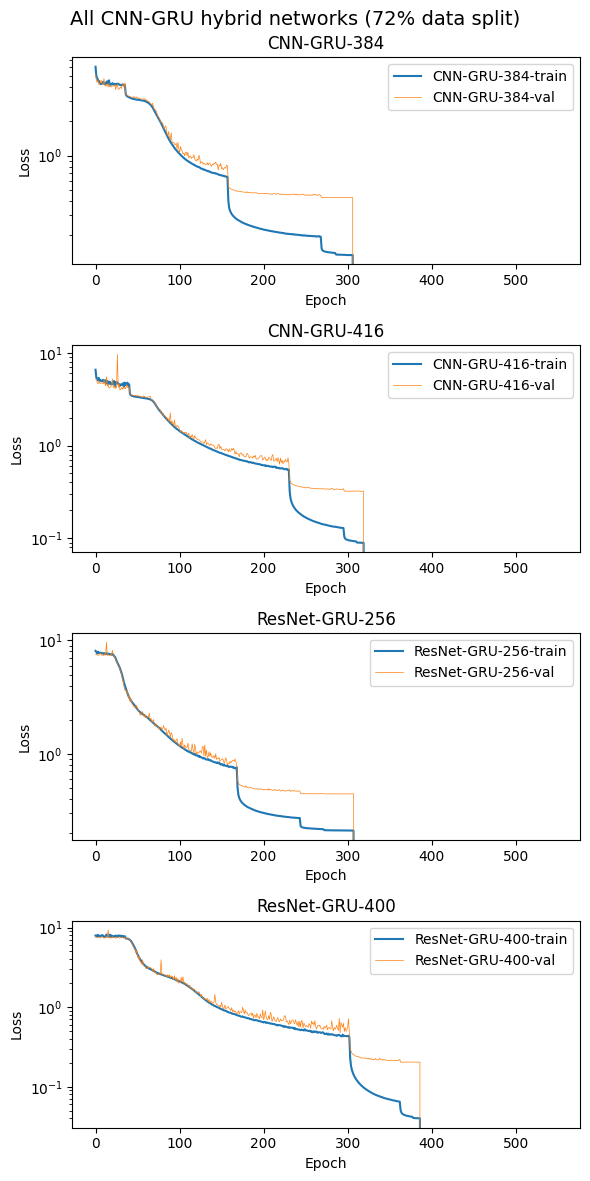

In [16]:
titles = ['CNN-GRU-384','CNN-GRU-416','ResNet-GRU-256','ResNet-GRU-400']

fig, ax = plt.subplots(4,1, figsize = (6, 12), tight_layout = True)
for i in range(4):
    ax[i].plot(loss_dict_cnn_gru_list[i][['train_loss']], label = f'{titles[i]}-train')
    ax[i].plot(loss_dict_cnn_gru_list[i][['test_loss']], label = f'{titles[i]}-val',linewidth = 0.5)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Loss')
    ax[i].set_title(f'{titles[i]}')
    ax[i].legend()
    ax[i].set_yscale('log')

fig.suptitle('All CNN-GRU hybrid networks (72% data split)', fontsize = 14)
plt.savefig('CNN_GRU-ResNet_GRU_train-val_losses-72')

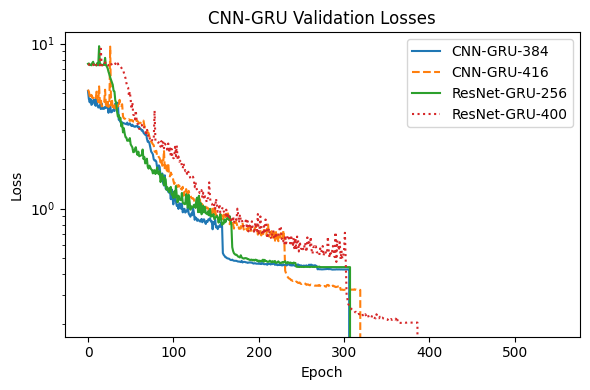

In [17]:
#CNN-GRU ALL MODELS PLOTTED TOGETHER
fig, ax = plt.subplots(1,1, figsize = (6,4), tight_layout = True)
ax.plot(loss_dict_cnn_gru_384[['test_loss']], label = 'CNN-GRU-384')
ax.plot(loss_dict_cnn_gru_416[['test_loss']], label = 'CNN-GRU-416', linestyle = 'dashed')
ax.plot(loss_dict_resnet_gru_256[['test_loss']], label = 'ResNet-GRU-256')
ax.plot(loss_dict_resnet_gru_400[['test_loss']], label = 'ResNet-GRU-400', linestyle = 'dotted')
ax.set_title('CNN-GRU Validation Losses')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.set_yscale('log')
plt.savefig('CNN-GRU_all_losses')

## CNN-LSTM hybrids

In [18]:
loss_dict_cnn_lstm_256 = pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss_dict_cnn_lstm_256.csv')
loss_dict_cnn_lstm_384 =pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss_dict_cnn_lstm_384.csv')
loss_dict_cnn_lstm_400 =pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss_dict_cnn_lstm_400.csv')
loss_dict_cnn_lstm_416 =pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss_dict_cnn_lstm_416.csv')

loss_dict_cnn_lstm_list = [loss_dict_cnn_lstm_256, loss_dict_cnn_lstm_384,loss_dict_cnn_lstm_400,loss_dict_cnn_lstm_416]

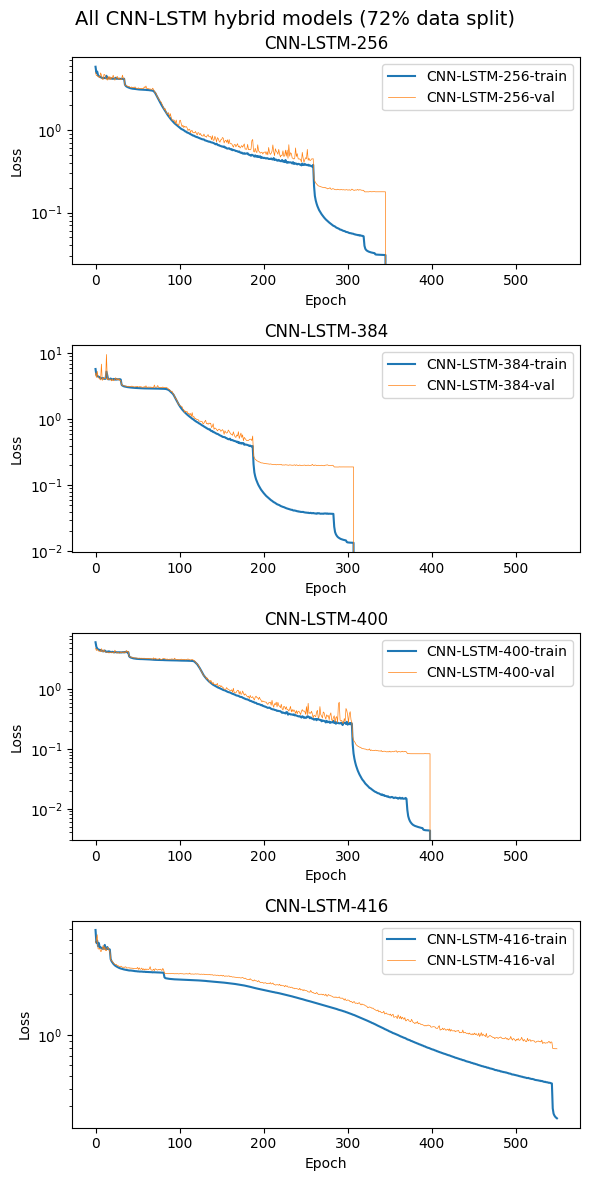

In [19]:
#CNN-LSTM NORMAL + LOG SCALE
titles = ['CNN-LSTM-256','CNN-LSTM-384','CNN-LSTM-400','CNN-LSTM-416']
fig, ax = plt.subplots(4,1, figsize = (6, 12), tight_layout = True)
for i in range(4):
    ax[i].plot(loss_dict_cnn_lstm_list[i][['train_loss']], label = f'{titles[i]}-train')
    ax[i].plot(loss_dict_cnn_lstm_list[i][['val_loss']], label = f'{titles[i]}-val',linewidth = 0.5)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Loss')
    ax[i].set_title(f'{titles[i]}')
    ax[i].legend()
    ax[i].set_yscale('log')
plt.suptitle('All CNN-LSTM hybrid models (72% data split)', fontsize = 14)
plt.savefig('CNN_LSTM_train-val_losses-72')

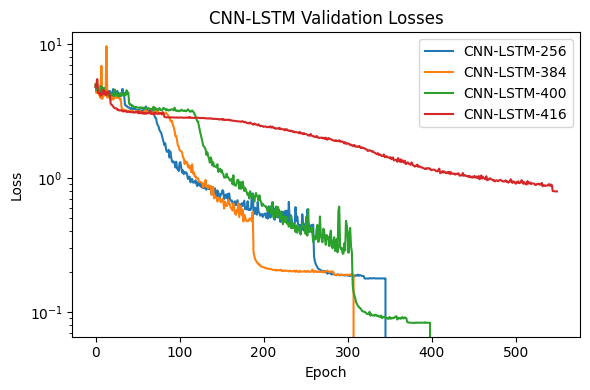

In [20]:
#CNN-LSTM ALL MODELS PLOTTED TOGETHER
fig, ax = plt.subplots(1,1, figsize = (6,4), tight_layout = True)
ax.plot(loss_dict_cnn_lstm_256[['val_loss']], label = 'CNN-LSTM-256')
ax.plot(loss_dict_cnn_lstm_384[['val_loss']], label = 'CNN-LSTM-384')
ax.plot(loss_dict_cnn_lstm_400[['val_loss']], label = 'CNN-LSTM-400')
ax.plot(loss_dict_cnn_lstm_416[['val_loss']], label = 'CNN-LSTM-416')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('CNN-LSTM Validation Losses')
ax.legend()
ax.set_yscale('log')
plt.savefig('CNN_LSTM_all_val_losses_logscale')

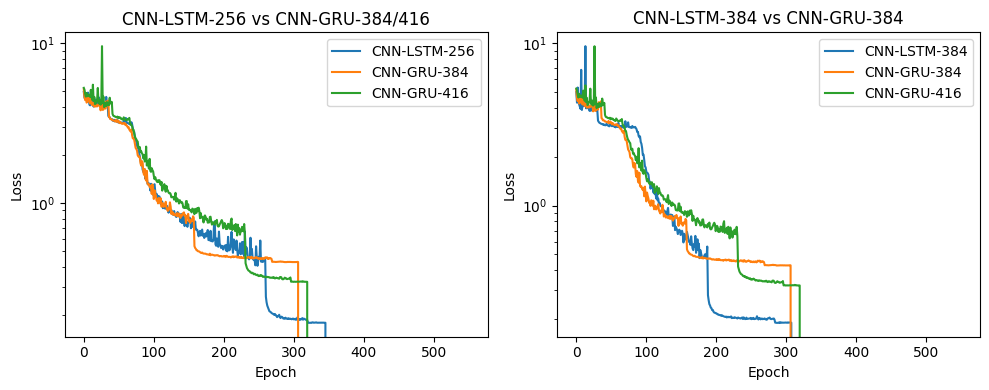

In [21]:
fig, ax = plt.subplots(1,2, figsize = (10,4),tight_layout = True)
ax[0].plot(loss_dict_cnn_lstm_256[['val_loss']], label = 'CNN-LSTM-256')
ax[0].plot(loss_dict_cnn_gru_384[['test_loss']], label = 'CNN-GRU-384')
ax[0].plot(loss_dict_cnn_gru_416[['test_loss']], label = 'CNN-GRU-416')
ax[0].set_title('CNN-LSTM-256 vs CNN-GRU-384/416')
ax[0].set_yscale('log')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(loss_dict_cnn_lstm_384[['val_loss']], label = 'CNN-LSTM-384')
ax[1].plot(loss_dict_cnn_gru_384[['test_loss']], label = 'CNN-GRU-384')
ax[1].plot(loss_dict_cnn_gru_416[['test_loss']], label = 'CNN-GRU-416')
ax[1].set_title('CNN-LSTM-384 vs CNN-GRU-384')
ax[1].set_yscale('log')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.savefig('LSTM_vs_GRU')

## LSTM-based models

In [22]:
loss_dict_lstm_400 =pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss_dict_lstm_400.csv')
loss_dict_lstm_424 =pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss-dict-lstm-424.csv')
loss_dict_lstm_448 =pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss-dict-lstm-448.csv')
loss_dict_lstm_456 =pd.read_csv('/kaggle/input/calabi-yau-cicy-4-folds/train-validation-losses/loss_dict_lstm_456.csv')

loss_dict_lstm_list = [loss_dict_lstm_400, loss_dict_lstm_424,loss_dict_lstm_448,loss_dict_lstm_456]

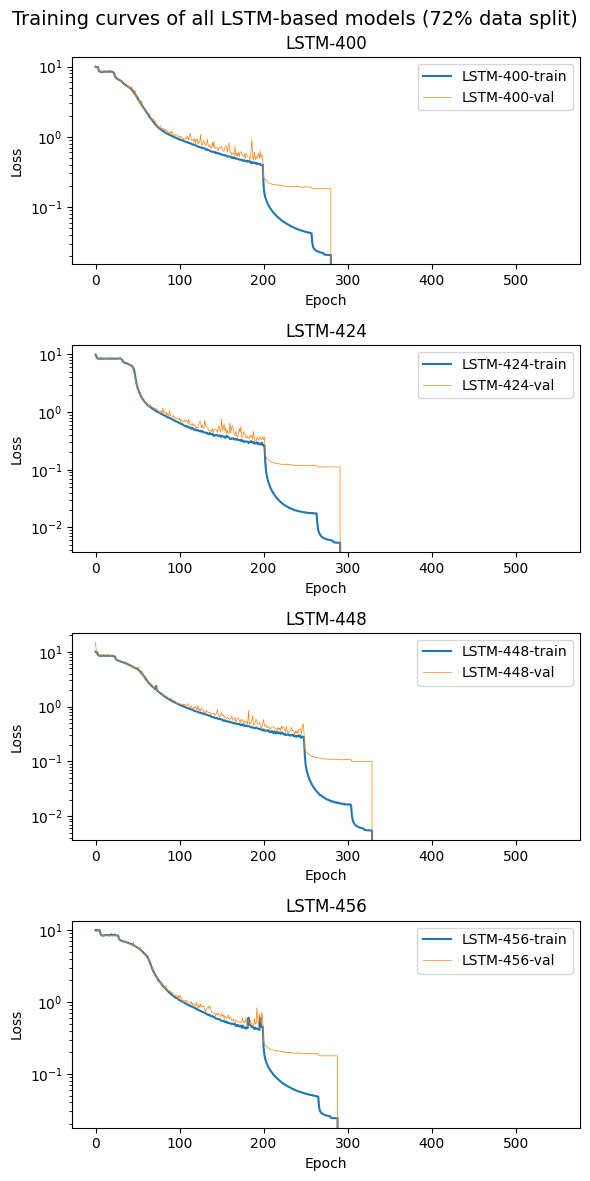

In [23]:
#LSTM NORMAL + LOG SCALE
titles = ['LSTM-400','LSTM-424','LSTM-448','LSTM-456']
fig, ax = plt.subplots(4,1, figsize = (6, 12), tight_layout = True)
for i in range(4):
    ax[i].plot(loss_dict_lstm_list[i][['train_loss']], label = f'{titles[i]}-train')
    ax[i].plot(loss_dict_lstm_list[i][['test_loss']], label = f'{titles[i]}-val',linewidth = 0.5)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Loss')
    ax[i].set_title(f'{titles[i]}')
    ax[i].legend()
    ax[i].set_yscale('log')    
plt.suptitle('Training curves of all LSTM-based models (72% data split)', fontsize = 14)
plt.savefig('LSTM_train-val_losses_all-72')

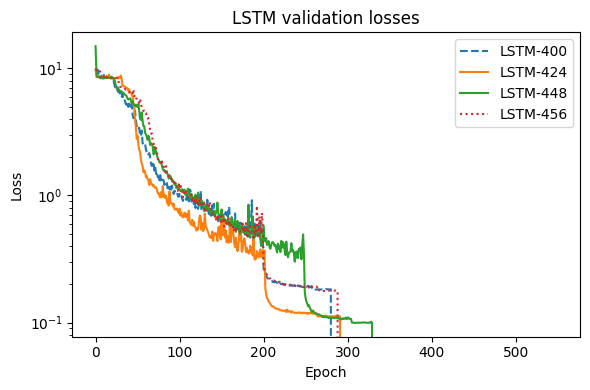

In [24]:
# LSTM MODELS PLOTTED TOGETHER
fig, ax = plt.subplots(1,1, figsize = (6, 4), tight_layout = True)
ax.plot(loss_dict_lstm_400[['test_loss']], label = 'LSTM-400', linestyle = 'dashed')
ax.plot(loss_dict_lstm_424[['test_loss']], label = 'LSTM-424')
ax.plot(loss_dict_lstm_448[['test_loss']], label = 'LSTM-448')
ax.plot(loss_dict_lstm_456[['test_loss']], label = 'LSTM-456', linestyle = 'dotted')
ax.set_title('LSTM validation losses')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.set_yscale('log')

plt.savefig('LSTM_train-val_losses')

# Datasets used for 5-fold cross validation training

In [25]:
def plot_hodge_distribution(fold,hodge_ytrain, hodge_yval, style, style1, style2):
    fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)
    
    ax[0,0].hist(hodge[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'full set', **style)
    ax[0,0].hist(hodge_ytrain[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'train set', **style1)
    ax[0,0].hist(hodge_yval[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'val set', **style2)
    ax[0,0].set_title('$h^{(1,1)}$')
    ax[0,0].set_ylabel('Count')
    ax[0,0].legend()
    ax[0,0].grid()
    ax[0,0].set_yscale('log')
    
    ax[0,1].hist(hodge[:,1], bins=range(h21min, h21max+1), alpha=0.5, label = 'full set', **style)
    ax[0,1].hist(hodge_ytrain[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='train set',**style1)
    ax[0,1].hist(hodge_yval[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='validation set',**style2)
    ax[0,1].set_title('$h^{(2,1)}$')
    ax[0,1].set_ylabel('Count')
    ax[0,1].legend()
    ax[0,1].grid()
    ax[0,1].set_yscale('log')
    
    ax[1,0].hist(hodge[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='full set', **style)
    ax[1,0].hist(hodge_ytrain[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='train set',**style1)
    ax[1,0].hist(hodge_yval[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='validation set',**style2)
    ax[1,0].set_title('$h^{(3,1)}$')
    ax[1,0].set_ylabel('Count')
    ax[1,0].legend()
    ax[1,0].grid()
    ax[1,0].set_yscale('log')
    
    ax[1,1].hist(hodge[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'full set', **style)
    ax[1,1].hist(hodge_ytrain[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'train set',**style1)
    ax[1,1].hist(hodge_yval[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'validation set', **style2)
    ax[1,1].set_title('$h^{(2,2)}$')
    ax[1,1].set_ylabel('Count')
    ax[1,1].legend()
    ax[1,1].grid()
    ax[1,1].set_yscale('log')
    
    plt.suptitle(f'Distributions of Hodge numbers in full/train/validation sets for fold-{fold}')
    plt.savefig(f'Hodge_numbers_distributions_fold_{fold}')

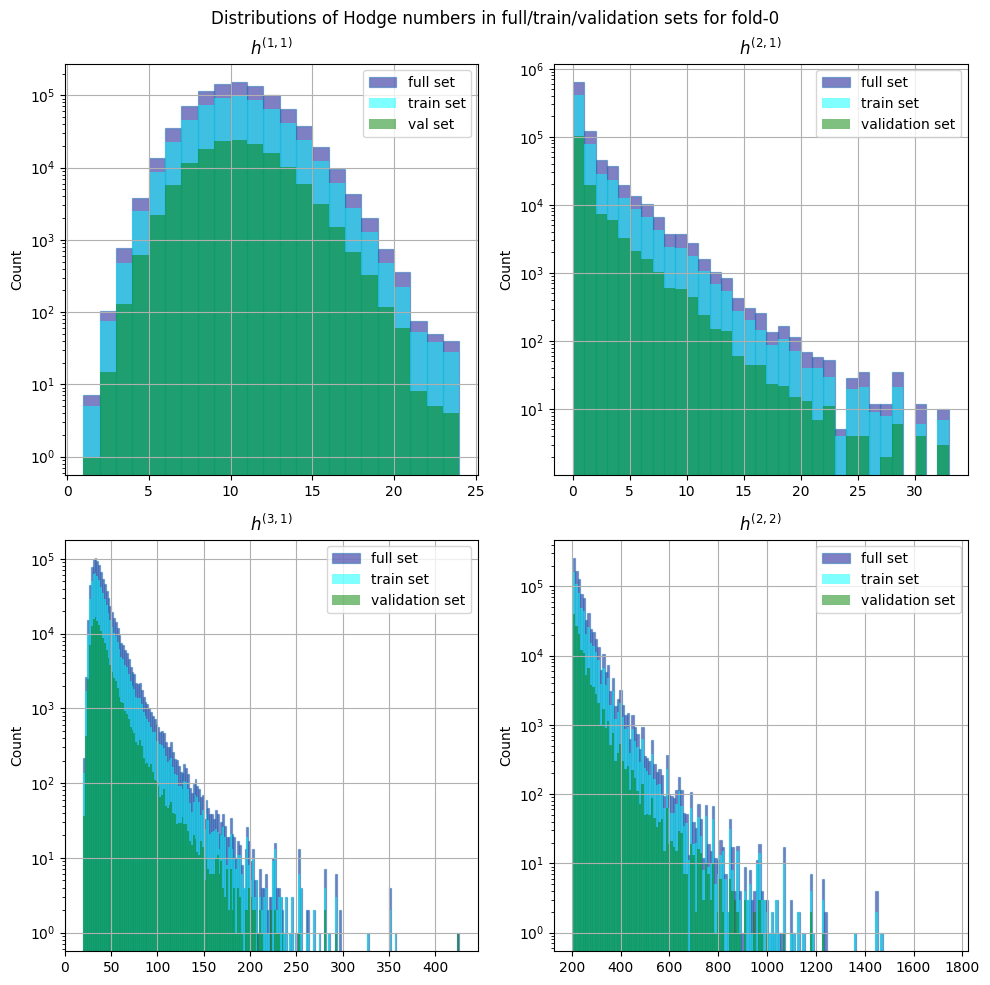

In [26]:
hodge_f0_t = np.load('/kaggle/input/calabi-yau-cicy-4-folds/5_fold_CV_train_val_Y_data/foldx_0_ytrain.npy')
hodge_f0_v = np.load('/kaggle/input/calabi-yau-cicy-4-folds/5_fold_CV_train_val_Y_data/foldx_0_yval.npy')

style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style2 = {'facecolor': 'green'}
style1 = {'facecolor': 'cyan'}

plot_hodge_distribution(0, hodge_f0_t, hodge_f0_v, style, style1, style2)

In [27]:
h11mx, h11mn,h11me, h21mx, h21mn, h21me, h31mx, h31mn, h31me, h22mx, h22mn, h22me=find_max_mean_min(hodge_f0_t)

Max h11: 24, Min h11: 1, Mean h11: 10.066
Max h21: 33, Min h21: 0, Mean h21: 0.818
Max h31: 356, Min h31: 20, Mean h31: 39.54 
Max h22: 1472, Min h22: 204, Mean h22: 240.788 


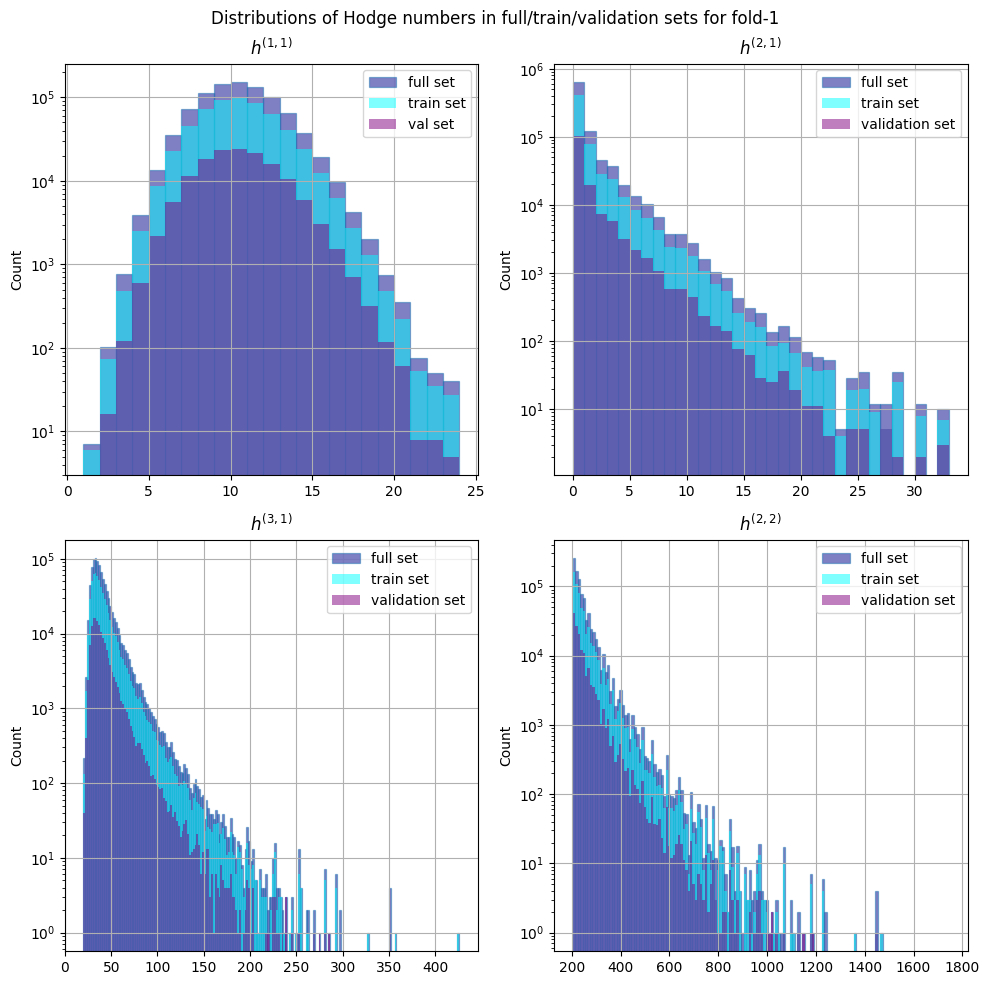

In [28]:
hodge_f1_t = np.load('/kaggle/input/calabi-yau-cicy-4-folds/5_fold_CV_train_val_Y_data/foldx_1_ytrain.npy')
hodge_f1_v = np.load('/kaggle/input/calabi-yau-cicy-4-folds/5_fold_CV_train_val_Y_data/foldx_1_yval.npy')

style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style2 = {'facecolor': 'purple'}
style1 = {'facecolor': 'cyan'}

plot_hodge_distribution(1, hodge_f1_t, hodge_f1_v, style, style1, style2)

In [29]:
h11mx, h11mn,h11me, h21mx, h21mn, h21me, h31mx, h31mn, h31me, h22mx, h22mn, h22me=find_max_mean_min(hodge_f1_t)

Max h11: 24, Min h11: 1, Mean h11: 10.064
Max h21: 33, Min h21: 0, Mean h21: 0.818
Max h31: 426, Min h31: 20, Mean h31: 39.555 
Max h22: 1752, Min h22: 204, Mean h22: 240.84 


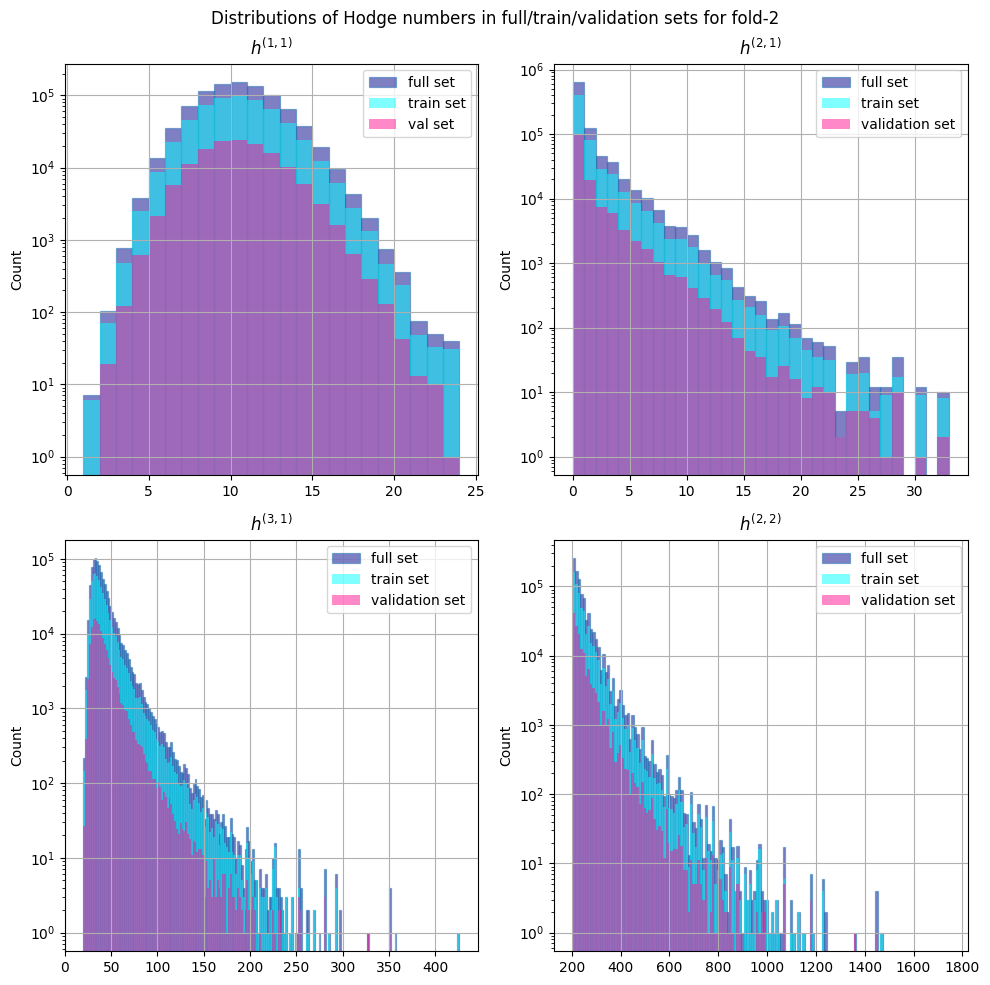

In [30]:
hodge_f2_t = np.load('/kaggle/input/calabi-yau-cicy-4-folds/5_fold_CV_train_val_Y_data/foldx_2_ytrain.npy')
hodge_f2_v = np.load('/kaggle/input/calabi-yau-cicy-4-folds/5_fold_CV_train_val_Y_data/foldx_2_yval.npy')

style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style2 = {'facecolor': 'deeppink'}
style1 = {'facecolor': 'cyan'}

plot_hodge_distribution(2, hodge_f2_t, hodge_f2_v, style, style1, style2)

In [31]:
h11mx, h11mn,h11me, h21mx, h21mn, h21me, h31mx, h31mn, h31me, h22mx, h22mn, h22me =find_max_mean_min(hodge_f2_t)

Max h11: 24, Min h11: 1, Mean h11: 10.065
Max h21: 33, Min h21: 0, Mean h21: 0.816
Max h31: 426, Min h31: 20, Mean h31: 39.55 
Max h22: 1752, Min h22: 204, Mean h22: 240.832 


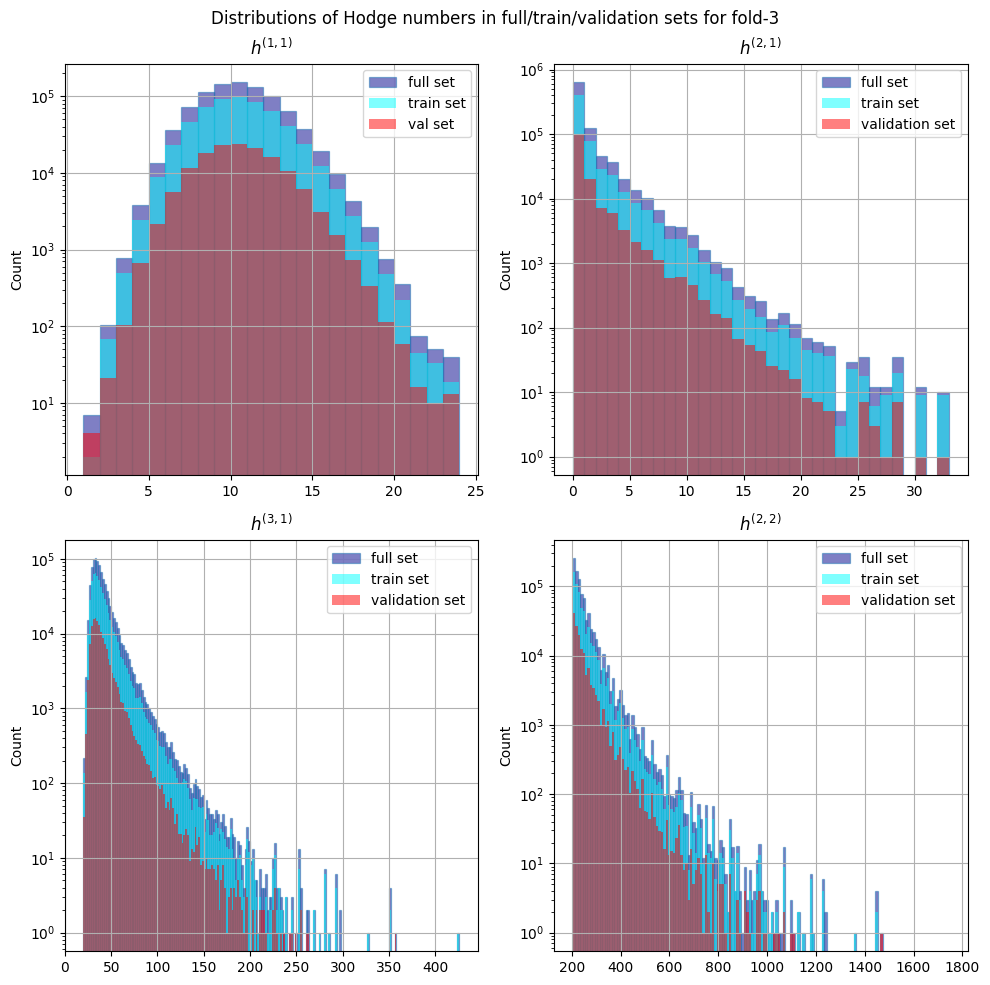

In [32]:
hodge_f3_t = np.load('/kaggle/input/calabi-yau-cicy-4-folds/5_fold_CV_train_val_Y_data/foldx_3_ytrain.npy')
hodge_f3_v = np.load('/kaggle/input/calabi-yau-cicy-4-folds/5_fold_CV_train_val_Y_data/foldx_3_yval.npy')

style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style2 = {'facecolor': 'red'}
style1 = {'facecolor': 'cyan'}

plot_hodge_distribution(3, hodge_f3_t, hodge_f3_v, style, style1, style2)

In [33]:
h11mx, h11mn,h11me, h21mx, h21mn, h21me, h31mx, h31mn, h31me, h22mx, h22mn, h22me=find_max_mean_min(hodge_f3_t)

Max h11: 24, Min h11: 1, Mean h11: 10.061
Max h21: 33, Min h21: 0, Mean h21: 0.817
Max h31: 426, Min h31: 20, Mean h31: 39.561 
Max h22: 1752, Min h22: 204, Mean h22: 240.855 


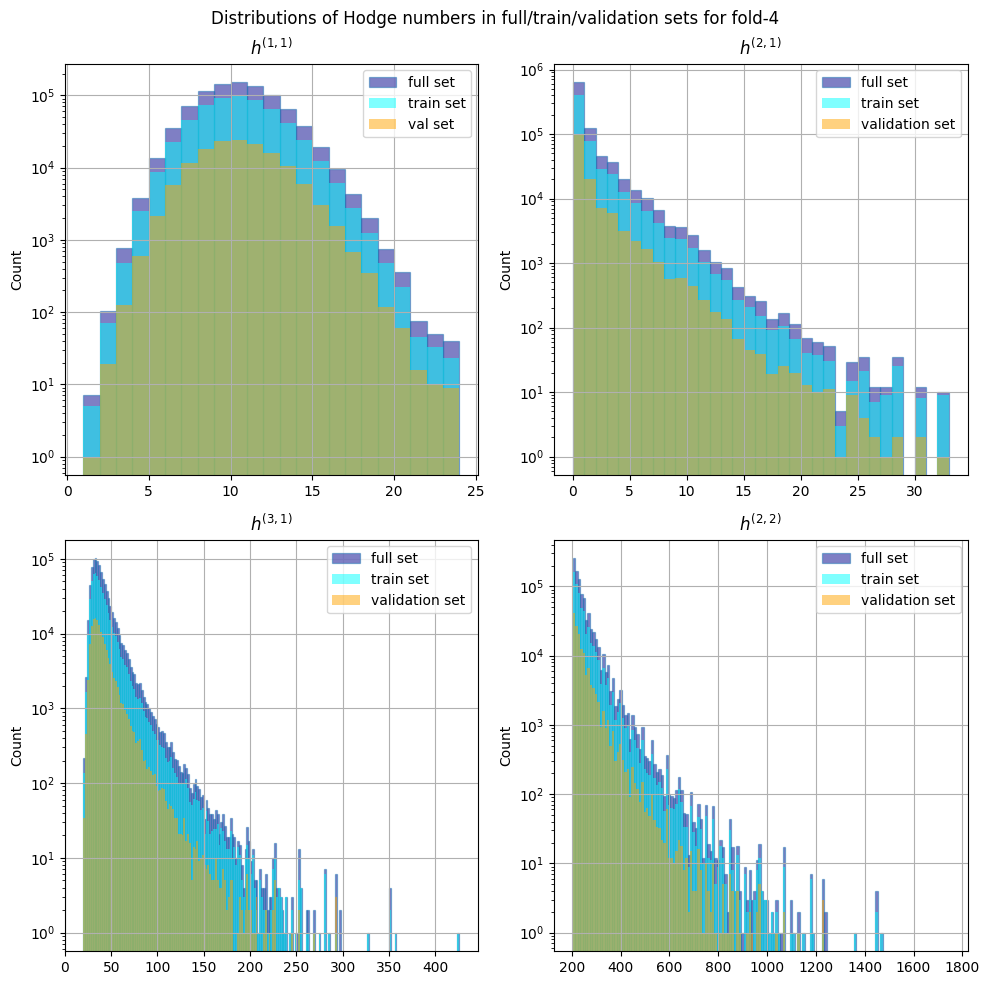

In [34]:
hodge_f4_t = np.load('/kaggle/input/calabi-yau-cicy-4-folds/5_fold_CV_train_val_Y_data/foldx_4_ytrain.npy')
hodge_f4_v = np.load('/kaggle/input/calabi-yau-cicy-4-folds/5_fold_CV_train_val_Y_data/foldx_4_yval.npy')

style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style2 = {'facecolor': 'orange'}
style1 = {'facecolor': 'cyan'}

plot_hodge_distribution(4, hodge_f4_t, hodge_f4_v, style, style1, style2)

In [35]:
h11mx, h11mn,h11me, h21mx, h21mn, h21me, h31mx, h31mn, h31me, h22mx, h22mn, h22me=find_max_mean_min(hodge_f4_t)

Max h11: 24, Min h11: 1, Mean h11: 10.065
Max h21: 33, Min h21: 0, Mean h21: 0.818
Max h31: 426, Min h31: 20, Mean h31: 39.562 
Max h22: 1752, Min h22: 204, Mean h22: 240.874 


# Training curves (5-fold CV)

In [36]:
loss_dict_5fcv = []
for i in range(5):
    loss_dict_5f = pd.read_csv(f'/kaggle/input/calabi-yau-cicy-4-folds/trained_models-[5-fold-CV]/loss_dict_lstm_448_fold{i}.csv')
    loss_dict_5fcv.append(loss_dict_5f)

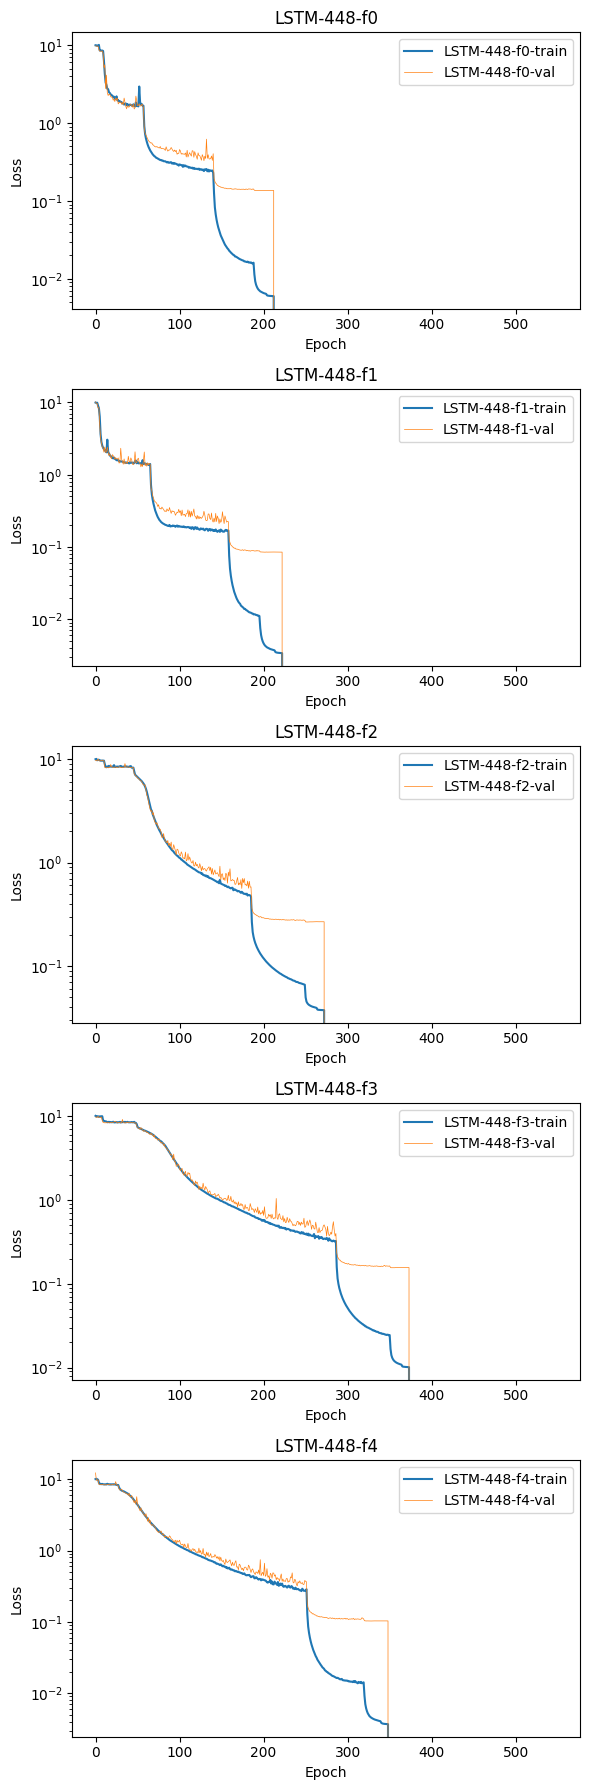

In [37]:
titles = ['LSTM-448-f0','LSTM-448-f1','LSTM-448-f2','LSTM-448-f3', 'LSTM-448-f4']
#loss_dict_5fcv
#LSTM NORMAL + LOG SCALE
fig, ax = plt.subplots(5,1, figsize = (6, 18), tight_layout = True)
for i in range(5):
    ax[i].plot(loss_dict_5fcv[i][['train_loss']], label = f'{titles[i]}-train')
    ax[i].plot(loss_dict_5fcv[i][['val_loss']], label = f'{titles[i]}-val',linewidth = 0.5)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Loss')
    ax[i].set_title(f'{titles[i]}')
    ax[i].legend()
    ax[i].set_yscale('log')
    
#plt.suptitle('Training curves of five LSTM-448 models (5-fold CV)', fontsize = 14)
plt.savefig('LSTM_448_5fcv_train-val_losses_all')

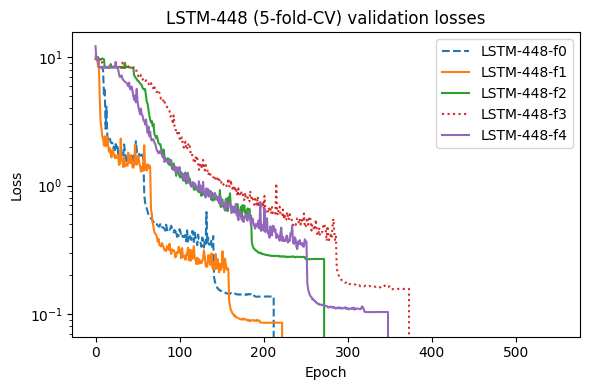

In [38]:
# LSTM MODELS PLOTTED TOGETHER
fig, ax = plt.subplots(1,1, figsize = (6, 4), tight_layout = True)
ax.plot(loss_dict_5fcv[0][['val_loss']], label = 'LSTM-448-f0', linestyle = 'dashed')
ax.plot(loss_dict_5fcv[1][['val_loss']], label = 'LSTM-448-f1')
ax.plot(loss_dict_5fcv[2][['val_loss']], label = 'LSTM-448-f2')
ax.plot(loss_dict_5fcv[3][['val_loss']], label = 'LSTM-448-f3', linestyle = 'dotted')
ax.plot(loss_dict_5fcv[4][['val_loss']], label = 'LSTM-448-f4')
ax.set_title('LSTM-448 (5-fold-CV) validation losses')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.set_yscale('log')

plt.savefig('LSTM_5fcv_train-val_losses')